In [39]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://pythonizing.github.io/data/real-estate/rock-springs-wy/LCWYROCKSPRINGS/")
c = r.content

soup=BeautifulSoup(c,"html.parser")

all=soup.find_all("div",{"class":"propertyRow"})

It has a length property, which can tell us how many of these items exist.

len(all)

You can search elements in the list by index.

all[0]

You can also search within each element. It's best practice to highlight the class, not just the tag (h4). You could also use find_all() here as well.

all[0].find("h4",{"class":"propPrice"})

The above contents are all strings, which enables us to put string methods against them (see below).

all[0].find("h4",{"class":"propPrice"}).text

It looks strange, but we can just replace() out the unnecessary characters.

all[0].find("h4",{"class":"propPrice"}).text.replace("\n","")

Now, pull out the white space (at the end of the statement).

all[0].find("h4",{"class":"propPrice"}).text.replace("\n","").replace(" ","")

SyntaxError: invalid syntax (<ipython-input-39-9f7c5d3ef537>, line 11)

In [40]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://pythonizing.github.io/data/real-estate/rock-springs-wy/LCWYROCKSPRINGS/")
c = r.content

soup=BeautifulSoup(c,"html.parser")

all=soup.find_all("div",{"class":"propertyRow"})

len(all)

all[0]

all[0].find("h4",{"class":"propPrice"})

all[0].find("h4",{"class":"propPrice"}).text

all[0].find("h4",{"class":"propPrice"}).text.replace("\n","")

all[0].find("h4",{"class":"propPrice"}).text.replace("\n","").replace(" ","")

'$725,000'

A more efficient way would be better

Now we need to loop through each item in the webpage. Note the try and except statements; they will help you deal with the "None" object, which throws an exception when you employ the text method.  

In [41]:
import requests
from bs4 import BeautifulSoup

In [42]:
for item in all:
    print(item.find("h4",{"class","propPrice"}).text.replace("\n","").replace(" ",""))
    print(item.find_all("span",{"class","propAddressCollapse"})[0].text)
    print(item.find_all("span",{"class","propAddressCollapse"})[1].text)
    try:
        print(item.find("span",{"class","infoBed"}).text)
    except:
        pass
    print(" ")

$725,000
0 Gateway
Rock Springs, WY 82901
 
$452,900
1003 Winchester Blvd.
Rock Springs, WY 82901
4 Beds
 
$396,900
600 Talladega
Rock Springs, WY 82901
5 Beds
 
$389,900
3239 Spearhead Way
Rock Springs, WY 82901
4 Beds
 
$254,000
522 Emerald Street
Rock Springs, WY 82901
3 Beds
 
$252,900
1302 Veteran's Drive
Rock Springs, WY 82901
4 Beds
 
$210,000
1021 Cypress Cir
Rock Springs, WY 82901
4 Beds
 
$209,000
913 Madison Dr
Rock Springs, WY 82901
3 Beds
 
$199,900
1344 Teton Street
Rock Springs, WY 82901
3 Beds
 
$196,900
4 Minnies Lane
Rock Springs, WY 82901
3 Beds
 


To find just the "b" tag info for # of beds, you need to find "b" but note that it doesn't have a class tag.

In [43]:
for item in all:
    print(item.find("h4",{"class","propPrice"}).text.replace("\n","").replace(" ",""))
    print(item.find_all("span",{"class","propAddressCollapse"})[0].text)
    print(item.find_all("span",{"class","propAddressCollapse"})[1].text)
    try:
        print(item.find("span",{"class","infoBed"}).find("b").text)
    except:
        pass
    print(" ")

$725,000
0 Gateway
Rock Springs, WY 82901
 
$452,900
1003 Winchester Blvd.
Rock Springs, WY 82901
4
 
$396,900
600 Talladega
Rock Springs, WY 82901
5
 
$389,900
3239 Spearhead Way
Rock Springs, WY 82901
4
 
$254,000
522 Emerald Street
Rock Springs, WY 82901
3
 
$252,900
1302 Veteran's Drive
Rock Springs, WY 82901
4
 
$210,000
1021 Cypress Cir
Rock Springs, WY 82901
4
 
$209,000
913 Madison Dr
Rock Springs, WY 82901
3
 
$199,900
1344 Teton Street
Rock Springs, WY 82901
3
 
$196,900
4 Minnies Lane
Rock Springs, WY 82901
3
 


Do the same for other characteristics. Printing "none" clarifies what is or is not available.

In [44]:
for item in all:
    print(item.find("h4",{"class","propPrice"}).text.replace("\n","").replace(" ",""))
    print(item.find_all("span",{"class","propAddressCollapse"})[0].text)
    print(item.find_all("span",{"class","propAddressCollapse"})[1].text)
    
    try:
        print(item.find("span",{"class","infoBed"}).find("b").text)
    except:
        print(None)
    
    try:
        print(item.find("span",{"class","infoSqFt"}).find("b").text)
    except:
        print(None)

    try:
        print(item.find("span",{"class","infoValueFullBath"}).find("b").text)
    except:
        print(None)
    
    try:
        print(item.find("span",{"class","infoValueHalfBath"}).find("b").text)
    except:
        print(None)
    
    print(" ")

$725,000
0 Gateway
Rock Springs, WY 82901
None
None
None
None
 
$452,900
1003 Winchester Blvd.
Rock Springs, WY 82901
4
None
4
None
 
$396,900
600 Talladega
Rock Springs, WY 82901
5
3,154
3
None
 
$389,900
3239 Spearhead Way
Rock Springs, WY 82901
4
3,076
3
1
 
$254,000
522 Emerald Street
Rock Springs, WY 82901
3
1,172
3
None
 
$252,900
1302 Veteran's Drive
Rock Springs, WY 82901
4
1,932
2
None
 
$210,000
1021 Cypress Cir
Rock Springs, WY 82901
4
1,676
3
None
 
$209,000
913 Madison Dr
Rock Springs, WY 82901
3
1,344
2
None
 
$199,900
1344 Teton Street
Rock Springs, WY 82901
3
1,920
2
None
 
$196,900
4 Minnies Lane
Rock Springs, WY 82901
3
1,664
2
None
 


We can also embed loops within a larger loop (a zip() function iterates through two lists at the same time).

In [45]:
for item in all:
    print(item.find("h4",{"class","propPrice"}).text.replace("\n","").replace(" ",""))
    print(item.find_all("span",{"class","propAddressCollapse"})[0].text)
    print(item.find_all("span",{"class","propAddressCollapse"})[1].text)
    
    try:
        print(item.find("span",{"class","infoBed"}).find("b").text)
    except:
        print(None)
    
    try:
        print(item.find("span",{"class","infoSqFt"}).find("b").text)
    except:
        print(None)

    try:
        print(item.find("span",{"class","infoValueFullBath"}).find("b").text)
    except:
        print(None)
    
    try:
        print(item.find("span",{"class","infoValueHalfBath"}).find("b").text)
    except:
        print(None)
    
    for column_group in item.find_all("div",{"class":"columnGroup"}):
        # print(column_group)
        for feature_group, feature_name in zip(column_group.find_all("span",{"class":"featureGroup"}),column_group.find_all("span",{"class":"featureName"})):
            # print(feature_group.text, feature_name.text)
            if "Lot Size" in feature_group.text:  # to pull out one data point in the group.
                print(feature_name.text)
    print(" ")

$725,000
0 Gateway
Rock Springs, WY 82901
None
None
None
None
 
$452,900
1003 Winchester Blvd.
Rock Springs, WY 82901
4
None
4
None
0.21 Acres
 
$396,900
600 Talladega
Rock Springs, WY 82901
5
3,154
3
None
 
$389,900
3239 Spearhead Way
Rock Springs, WY 82901
4
3,076
3
1
Under 1/2 Acre, 
 
$254,000
522 Emerald Street
Rock Springs, WY 82901
3
1,172
3
None
Under 1/2 Acre, 
 
$252,900
1302 Veteran's Drive
Rock Springs, WY 82901
4
1,932
2
None
0.27 Acres
 
$210,000
1021 Cypress Cir
Rock Springs, WY 82901
4
1,676
3
None
Under 1/2 Acre, 
 
$209,000
913 Madison Dr
Rock Springs, WY 82901
3
1,344
2
None
Under 1/2 Acre, 
 
$199,900
1344 Teton Street
Rock Springs, WY 82901
3
1,920
2
None
Under 1/2 Acre, 
 
$196,900
4 Minnies Lane
Rock Springs, WY 82901
3
1,664
2
None
2.02 Acres
 


To build the data out into a format a database could consume, we need to turn it into a series of dictionaries with keys:

In [46]:
l = [] # an empty list
for item in all:
    d = {}
    d["Address"] = item.find_all("span",{"class","propAddressCollapse"})[0].text
    d["Locality"] = item.find_all("span",{"class","propAddressCollapse"})[1].text
    d["Price"] = item.find("h4",{"class","propPrice"}).text.replace("\n","").replace(" ","")
  
    try:
        d["Beds"] = item.find("span",{"class","infoBed"}).find("b").text
    except:
        d["Beds"] = None
    
    try:
        d["Area"] = item.find("span",{"class","infoSqFt"}).find("b").text
    except:
        d["Area"] = None

    try:
        d["Full Baths"] = item.find("span",{"class","infoValueFullBath"}).find("b").text
    except:
        d["Full Baths"] = None
    
    try:
        d["Half Baths"] = item.find("span",{"class","infoValueHalfBath"}).find("b").text
    except:
        d["Half Baths"] = None
    
    for column_group in item.find_all("div",{"class":"columnGroup"}):
        for feature_group, feature_name in zip(column_group.find_all("span",{"class":"featureGroup"}),column_group.find_all("span",{"class":"featureName"})):
            # print(feature_group.text, feature_name.text)
            if "Lot Size" in feature_group.text:  # to pull out one data point in the group.
                d["Lot Size"] = feature_name.text
    l.append(d)

In [47]:
l

[{'Address': '0 Gateway',
  'Locality': 'Rock Springs, WY 82901',
  'Price': '$725,000',
  'Beds': None,
  'Area': None,
  'Full Baths': None,
  'Half Baths': None},
 {'Address': '1003 Winchester Blvd.',
  'Locality': 'Rock Springs, WY 82901',
  'Price': '$452,900',
  'Beds': '4',
  'Area': None,
  'Full Baths': '4',
  'Half Baths': None,
  'Lot Size': '0.21 Acres'},
 {'Address': '600 Talladega',
  'Locality': 'Rock Springs, WY 82901',
  'Price': '$396,900',
  'Beds': '5',
  'Area': '3,154',
  'Full Baths': '3',
  'Half Baths': None},
 {'Address': '3239 Spearhead Way',
  'Locality': 'Rock Springs, WY 82901',
  'Price': '$389,900',
  'Beds': '4',
  'Area': '3,076',
  'Full Baths': '3',
  'Half Baths': '1',
  'Lot Size': 'Under 1/2 Acre, '},
 {'Address': '522 Emerald Street',
  'Locality': 'Rock Springs, WY 82901',
  'Price': '$254,000',
  'Beds': '3',
  'Area': '1,172',
  'Full Baths': '3',
  'Half Baths': None,
  'Lot Size': 'Under 1/2 Acre, '},
 {'Address': "1302 Veteran's Drive",
  '

In [48]:
len(l)

10

Just import pandas and drop the list in.

In [50]:
import pandas
df=pandas.DataFrame(l)

In [51]:
df

,Address,Locality,Price,Beds,Area,Full Baths,Half Baths,Lot Size
0,0 Gateway,"Rock Springs, WY 82901","$725,000",None,None,None,None,NaN
1,1003 Winchester Blvd.,"Rock Springs, WY 82901","$452,900",4,None,4,None,0.21 Acres
2,600 Talladega,"Rock Springs, WY 82901","$396,900",5,"3,154",3,None,NaN
3,3239 Spearhead Way,"Rock Springs, WY 82901","$389,900",4,"3,076",3,1,"Under 1/2 Acre,"
4,522 Emerald Street,"Rock Springs, WY 82901","$254,000",3,"1,172",3,None,"Under 1/2 Acre,"
5,1302 Veteran's Drive,"Rock Springs, WY 82901","$252,900",4,"1,932",2,None,0.27 Acres
6,1021 Cypress Cir,"Rock Springs, WY 82901","$210,000",4,"1,676",3,None,"Under 1/2 Acre,"
7,913 Madison Dr,"Rock Springs, WY 82901","$209,000",3,"1,344",2,None,"Under 1/2 Acre,"
8,1344 Teton Street,"Rock Springs, WY 82901","$199,900",3,"1,920",2,None,"Under 1/2 Acre,"
9,4 Minnies Lane,"Rock Springs, WY 82901","$196,900",3,"1,664",2,None,2.02 Acres


store it to a CSV file

In [52]:
df.to_csv("Output.csv")

to iterate through all pages in a site

https://pythonizing.github.io/data/real-estate/rock-springs-wy/LCWYROCKSPRINGS/0html
<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
  <title>
   Page not found · GitHub Pages
  </title>
  <style media="screen" type="text/css">
   body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6;
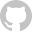
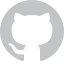
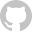
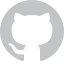

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
  <title>
   Page not found · GitHub Pages
  </title>
  <style media="screen" type="text/css">
   body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: ta
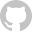
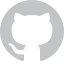

In [55]:
base_url = "https://pythonizing.github.io/data/real-estate/rock-springs-wy/LCWYROCKSPRINGS/"
for page in range(0,30,10):
    print(base_url+str(page)+"html")
    r=requests.get(base_url+str(page))
    c=r.content
    soup=BeautifulSoup(c,"html.parser")
    print(soup.prettify())